<a href="https://colab.research.google.com/github/EdwynZN/TLGColab/blob/main/DS_C6_SC2_EDWINZAMBRANONEMEGYEI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prince
!pip install umap
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import cluster, metrics, preprocessing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
from google.colab import drive
import prince
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Leer DF y ajustar columnas

In [2]:
employees = pd.read_csv(r"/content/gdrive/My Drive/Colab Notebooks/Employee Attrition/Train.csv")
employees.dropna(inplace=True)
pd.options.display.max_columns = None

In [3]:
employees.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,21,2,5,9.0,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613


In [4]:
employees.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000
mean,39.682608,3.183449,13.430600,2.362227,47.035494,0.813562,2.794134,6.019428,2.388754,3.095647,-0.010721,-0.009222,1.893518,2.839156,7.105548,3.248459,0.189369
std,13.608514,1.066708,10.365197,1.147448,15.750384,0.644909,1.167505,2.047820,1.121705,0.844288,0.990657,0.992386,0.527514,0.939750,1.160621,0.919758,0.185216
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.072000
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.143000
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,4.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.234700
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [5]:
employees.nunique()

Employee_ID                  5353
Gender                          2
Age                            47
Education_Level                 5
Relationship_Status             2
Hometown                        5
Unit                           12
Decision_skill_possess          4
Time_of_service                44
Time_since_promotion            5
growth_rate                    55
Travel_Rate                     3
Post_Level                      5
Pay_Scale                      10
Compensation_and_Benefits       5
Work_Life_balance               5
VAR1                            5
VAR2                            5
VAR3                            5
VAR4                            3
VAR5                            5
VAR6                            5
VAR7                            5
Attrition_rate               2917
dtype: int64

Las columnas VAR1 a VAR7 tienen pocos valores, por lo que consideramos que aúnque sean números flotantes en realidad son variables categoricas que fueron hasheadas o encriptadas, por lo que se revertiran a variables categoricas usando la nomenclatura 1A/B/etc para cada variable.

- La columna Employee_ID no da información relevante por lo que se eliminara

In [6]:
import string
vars_columns = {}

for i in range(1, 8):
  var_iter = f'VAR{i}'
  list_iter = [f'{i}{j}' for j in string.ascii_uppercase]
  dict_iter = dict(zip(employees[var_iter].unique(), list_iter))
  vars_columns[var_iter] = dict_iter

employees.replace(vars_columns, inplace=True)
employees.drop(['Employee_ID'], axis=1, inplace=True)

# variables que son en realidad enteros
employees = employees.astype({'Time_of_service': 'int', "Pay_Scale": 'int', 'Work_Life_balance': 'int'})
#employees['Attrition_rate'] = (employees['Attrition_rate'] >= .5).astype(int)

In [7]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5353 entries, 0 to 6999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     5353 non-null   object 
 1   Age                        5353 non-null   float64
 2   Education_Level            5353 non-null   int64  
 3   Relationship_Status        5353 non-null   object 
 4   Hometown                   5353 non-null   object 
 5   Unit                       5353 non-null   object 
 6   Decision_skill_possess     5353 non-null   object 
 7   Time_of_service            5353 non-null   int64  
 8   Time_since_promotion       5353 non-null   int64  
 9   growth_rate                5353 non-null   int64  
 10  Travel_Rate                5353 non-null   int64  
 11  Post_Level                 5353 non-null   int64  
 12  Pay_Scale                  5353 non-null   int64  
 13  Compensation_and_Benefits  5353 non-null   objec

### FAMD

Se prueba con FAMD en lugar de PCA por que es mixto

In [ ]:
employees_famd = employees.copy(deep=True)
#employees_famd.drop(['Employee_ID'], axis=1, inplace=True)
numerical_data = employees_famd.select_dtypes(include=[np.number])
continuos_cols = numerical_data.columns.tolist()

categorical_data = employees_famd.select_dtypes(exclude=[np.number])
columns = categorical_data.columns.tolist()

nunique_cat = employees_famd[columns].nunique()
nunique_cont = employees_famd[continuos_cols].nunique()

continous_df = employees_famd.loc[:, continuos_cols]

# Standarize numerical columns
#continous_df['Attrition_rate'] = np.log(continous_df['Attrition_rate'].mul(54).add(1))
#continous_df['Time_of_service'] = np.log(continous_df['Time_of_service'].add(1))
#continous_df['Time_of_service'] = continous_df['Time_of_service'].pow(0.44)

scaler = preprocessing.StandardScaler().set_output(transform='pandas')
continous_df = scaler.fit_transform(continous_df)

# transformed employee df
employees_famd = pd.concat([employees_famd.loc[:, columns], continous_df], axis=1)

In [ ]:
employees_famd.head()

,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate
0,F,Married,Franklin,IT,Conceptual,type2,1A,2A,3A,4A,5A,6A,7A,0.170306,0.765559,-0.909918,1.427451,-0.891204,0.289118,-1.536869,0.478881,0.544977,-0.028450
1,M,Single,Springfield,Logistics,Analytical,type2,1B,2B,3B,4A,5B,6A,7A,-1.152519,-0.171992,-0.813432,1.427451,-0.700715,-1.261634,0.176346,-0.009488,1.436560,-0.660744
2,F,Married,Clinton,Quality,Conceptual,type2,1A,2B,3B,4B,5B,6B,7A,1.346150,-0.171992,1.309253,0.555871,0.251732,-1.261634,-0.680261,0.967251,-1.238190,-0.563011
4,F,Married,Springfield,Logistics,Conceptual,type3,1C,2A,3B,4A,5C,6B,7B,-0.638087,-2.047096,-0.813432,1.427451,0.950193,0.289118,0.176346,-1.962967,0.544977,-0.036009
5,M,Married,Lebanon,Purchasing,Conceptual,type2,1B,2C,3A,4A,5C,6B,7A,1.052189,-0.171992,0.537368,-1.187290,-1.653161,1.839870,1.889562,1.455621,-1.238190,3.088207


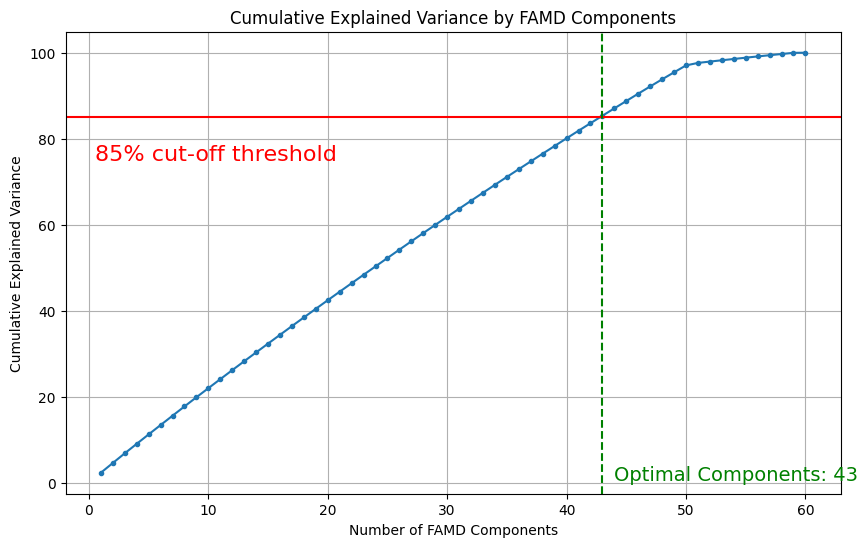

43

In [ ]:
famd = prince.FAMD(
    n_components=60,
    n_iter=5,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"
)
famd = famd.fit(employees_famd)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance = famd.cumulative_percentage_of_variance_
threshold = 85

# Plot the cumulative explained variance ratio to find the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='.', linestyle='-')
plt.title('Cumulative Explained Variance by FAMD Components')
plt.xlabel('Number of FAMD Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=threshold, color='r', linestyle='-') # 95% variance line for reference
plt.text(0.5, threshold - 10, f'{threshold}% cut-off threshold', color = 'red', fontsize=16)

# Determine the number of components that explain at least 95% of the variance
optimal_num_components = len(cumulative_explained_variance[cumulative_explained_variance < threshold]) + 1

# Highlight the optimal number of components on the plot
plt.axvline(x=optimal_num_components, color='g', linestyle='--')
plt.text(optimal_num_components + 1, 0.6, f'Optimal Components: {optimal_num_components}', color = 'green', fontsize=14)

plt.show()

# Returning the optimal number of components
optimal_num_components

In [ ]:
famd = prince.FAMD(
    n_components=43,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"
)
famd = famd.fit(employees_famd)
X = famd.transform(employees_famd)
X = X.to_numpy()

In [ ]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,7.650,2.28%,2.28%
1,7.581,2.26%,4.55%
2,7.533,2.25%,6.80%
3,7.400,2.21%,9.00%
4,7.355,2.20%,11.20%
5,7.291,2.18%,13.38%
6,7.255,2.17%,15.54%
7,7.235,2.16%,17.70%
8,7.158,2.14%,19.84%


La cantidad de componentes es alto con muy poco porcentaje de varianza entre ellos, posiblemente por una relación no lineal, por lo que es mejor optar por otro proceso de reducción como UMAP

### UMAP

In [10]:
from umap import UMAP
import umap.plot

2024-03-10 03:10:33.231434: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 03:10:33.231498: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 03:10:33.233498: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-10 03:10:33.243292: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-10 03:10:34.478800: W tensorflow/compiler/tf2

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
ordinalEncoder = preprocessing.OrdinalEncoder().set_output(transform='pandas')
oneHotEncoder = OneHotEncoder(sparse_output=False, drop = 'first').set_output(transform='pandas')

employees_tf = employees
numerical_data = employees_tf.select_dtypes(include=[np.number])
continuos_cols = numerical_data.columns.tolist()

categorical_data = employees_tf.select_dtypes(exclude=[np.number])
columns = categorical_data.columns.tolist()

nunique_cat = employees_tf[columns].nunique()
nunique_cont = employees_tf[continuos_cols].nunique()

dummies = oneHotEncoder.fit_transform(employees_tf[nunique_cat.index]).astype(int)

# transformed employee df
numerical_df = employees_tf.loc[:, ~employees_tf.columns.isin(nunique_cat.index.tolist())].copy(deep=True)

# Standarize numerical columns
numerical_df['Attrition_rate'] = np.log(numerical_df['Attrition_rate'].mul(54).add(1))
numerical_df['Time_of_service'] = np.log(numerical_df['Time_of_service'].add(1))

scaler = preprocessing.StandardScaler().set_output(transform='pandas')
numerical_df = scaler.fit_transform(numerical_df)
numerical_df.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate
0,0.170306,0.765559,-0.904368,1.427451,-0.891204,0.289118,-1.536869,0.478881,0.544977,0.366790
1,-1.152519,-0.171992,-0.686926,1.427451,-0.700715,-1.261634,0.176346,-0.009488,1.436560,-0.662996
2,1.346150,-0.171992,1.150253,0.555871,0.251732,-1.261634,-0.680261,0.967251,-1.238190,-0.433801
4,-0.638087,-2.047096,-0.686926,1.427451,0.950193,0.289118,0.176346,-1.962967,0.544977,0.358513
5,1.052189,-0.171992,0.748967,-1.187290,-1.653161,1.839870,1.889562,1.455621,-1.238190,1.975755


In [ ]:
numerical_embedding = UMAP(
    n_neighbors=25,
    min_dist=0,
    n_components=2,
    random_state=42,
).fit_transform(numerical_df)

In [ ]:
categorical_embedding = UMAP(n_neighbors=25, min_dist=0, metric='dice', n_components=2, random_state=42).fit_transform(dummies)

In [39]:
embedding = numerical_embedding * categorical_embedding

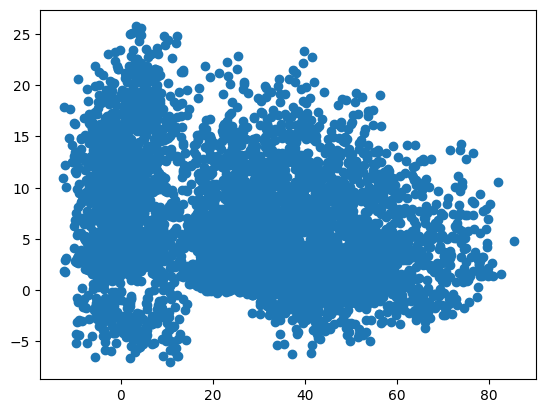

In [40]:
plt.scatter(embedding[:, 0], embedding[:, 1]);

In [16]:
X = embedding

### Gráficas de silueta

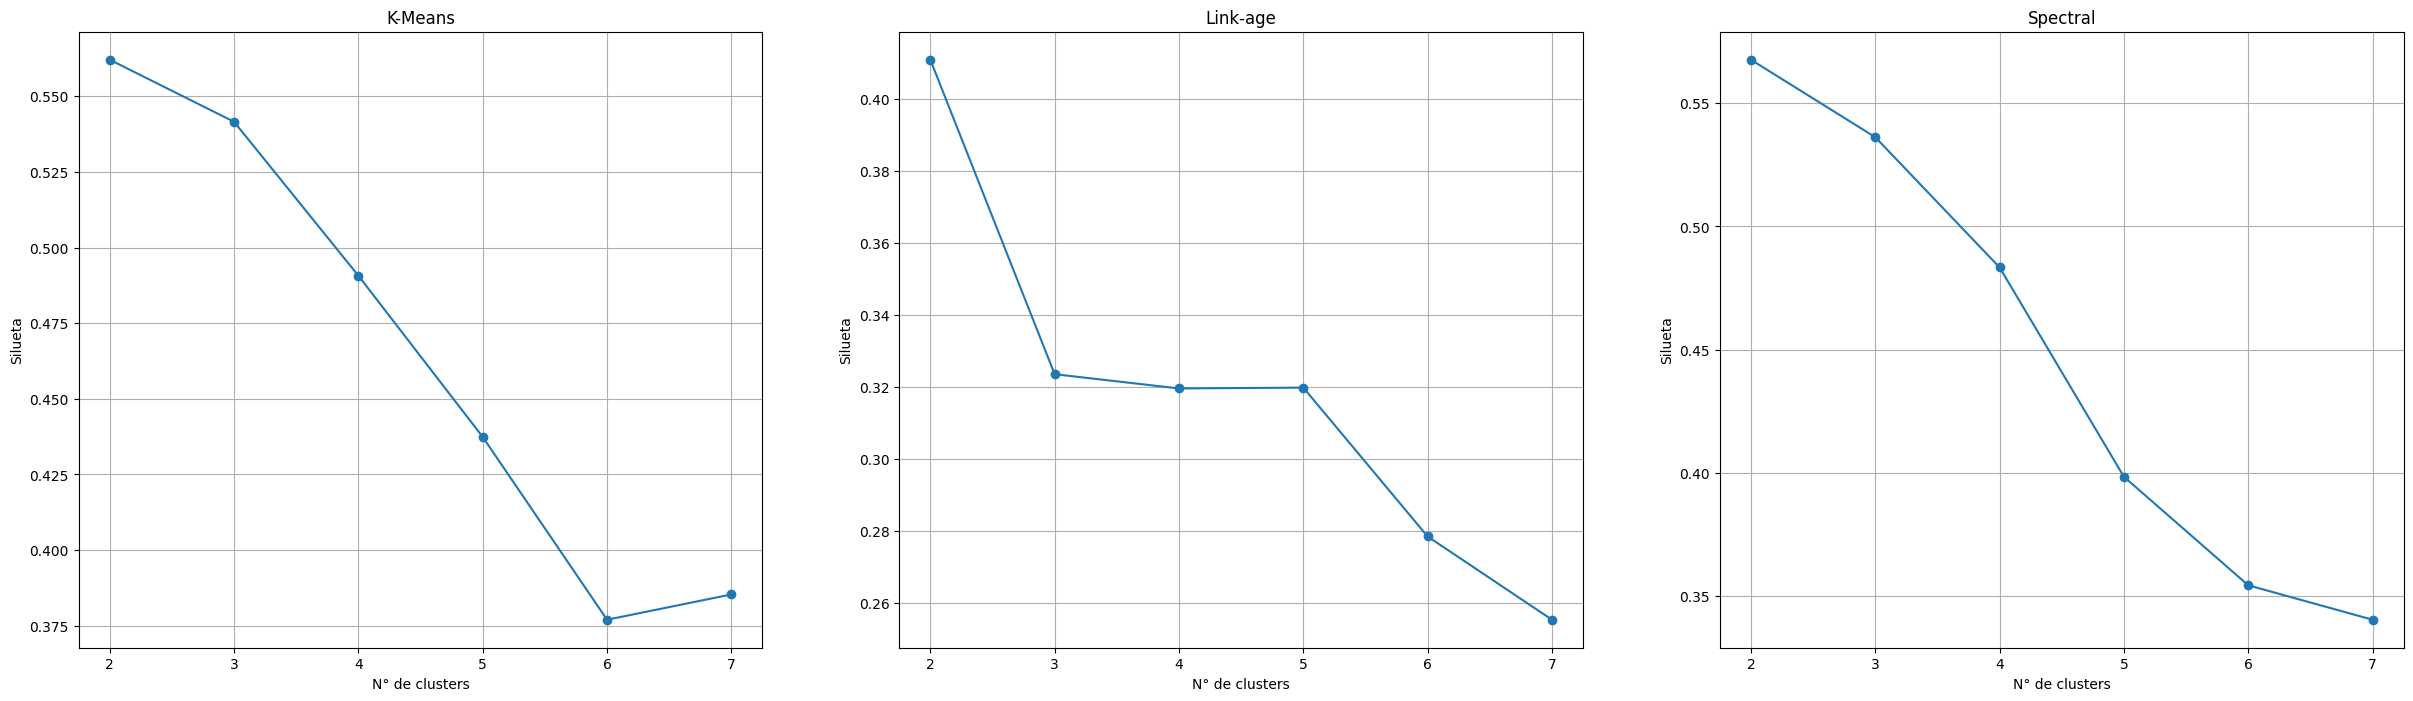

In [42]:
closter_x = []
y_value = []
y_link_value = []
y_spectral_value = []
#X = preprocessing.StandardScaler().fit_transform(employees_tf.to_numpy())

for k in range(2, 8):
  k_means = cluster.KMeans(init="k-means++", n_clusters=k, n_init=10).fit(X)
  link_means = cluster.AgglomerativeClustering(linkage='single', n_clusters=k)
  spectral_means = cluster.SpectralClustering(n_clusters=k, affinity="nearest_neighbors")
  y_link_pred = link_means.fit_predict(X)
  y_spectral_pred = spectral_means.fit_predict(X)
  y_value.append(metrics.silhouette_score(X, k_means.labels_))
  y_link_value.append(metrics.silhouette_score(X, y_link_pred))
  y_spectral_value.append(metrics.silhouette_score(X, y_spectral_pred))
  closter_x.append(k)

fig, (ax, ax2, ax3) = plt.subplots(ncols=3, figsize = (30, 8))

ax.plot(closter_x, y_value, 'o-')
ax.grid(True)
ax.set_xlabel('N° de clusters')
ax.set_ylabel('Silueta')
ax.set_title('K-Means');

ax2.plot(closter_x, y_link_value, 'o-')
ax2.grid(True)
ax2.set_xlabel('N° de clusters')
ax2.set_ylabel('Silueta')
ax2.set_title('Link-age');

ax3.plot(closter_x, y_spectral_value, 'o-')
ax3.grid(True)
ax3.set_xlabel('N° de clusters')
ax3.set_ylabel('Silueta')
ax3.set_title('Spectral');

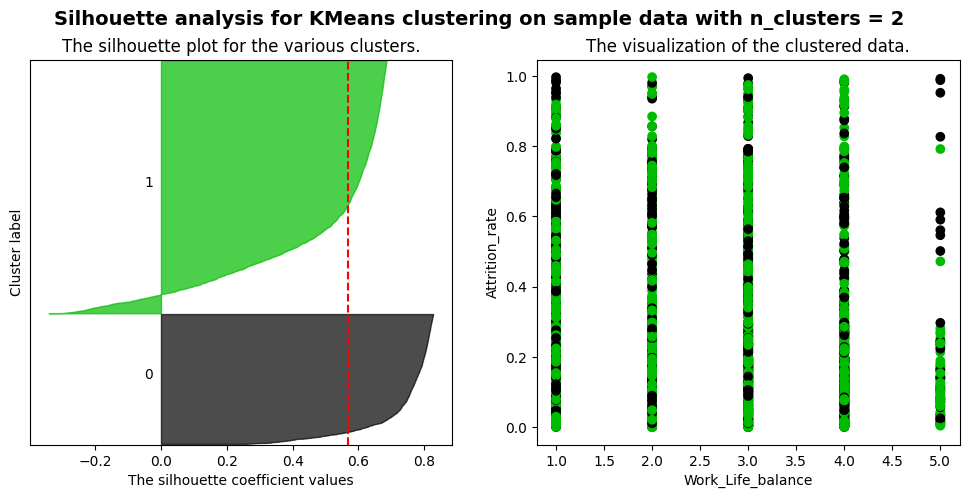

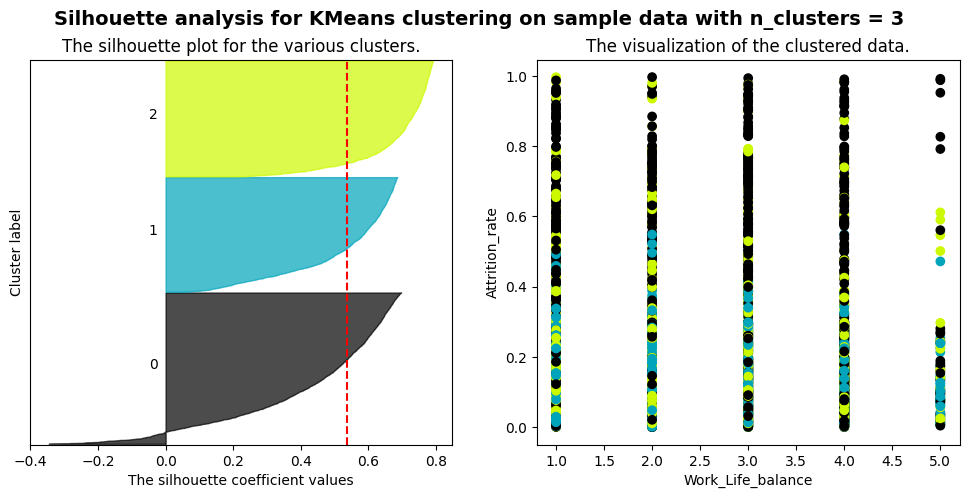

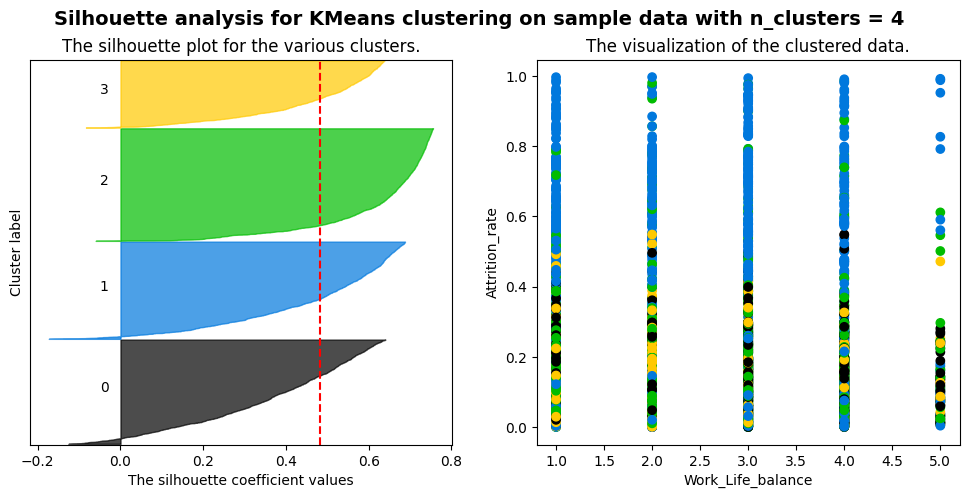

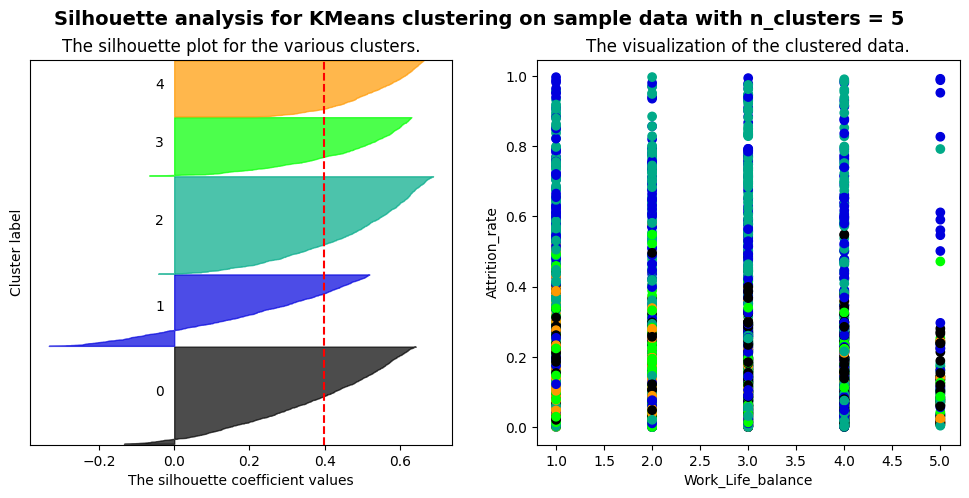

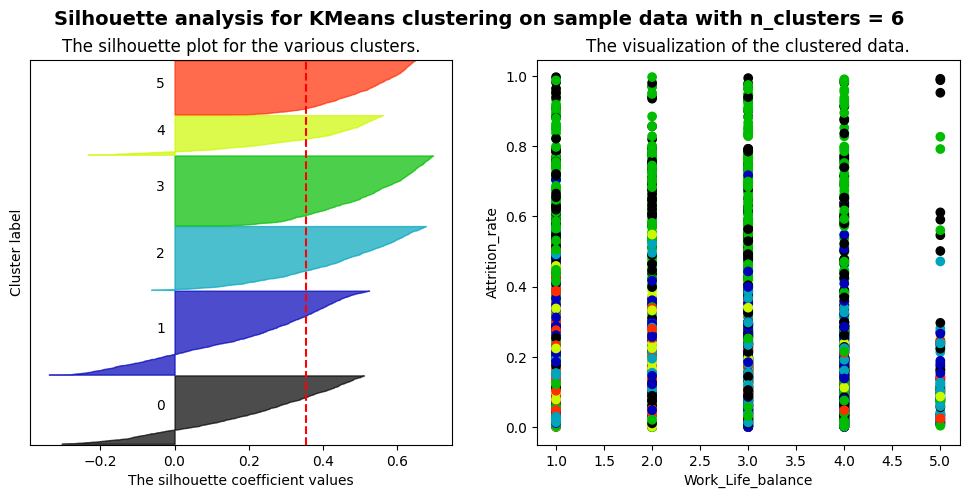

In [43]:
for k in range(2, 7):
  fig, (ax0, ax1) = plt.subplots(1, 2)
  fig.set_size_inches(12, 5)
  # The (k+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax0.set_ylim([0, len(X) + (k + 1) * 10])
  k_means = cluster.SpectralClustering(n_clusters=k, affinity="nearest_neighbors")
  y_pred = k_means.fit_predict(X)
  silhouette_avg = metrics.silhouette_score(X, y_pred)
  sample_silhouette_values = metrics.silhouette_samples(X, y_pred)
  y_lower = 10
  for i in range(k):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / k)
    ax0.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    # Label the silhouette plots with their cluster numbers at the middle
    ax0.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
  ax0.set_title("The silhouette plot for the various clusters.")
  ax0.set_xlabel("The silhouette coefficient values")
  ax0.set_ylabel("Cluster label")
  ax0.set_yticks([])  # Clear the yaxis labels / ticks
  # The vertical line for average silhouette score of all the values
  ax0.axvline(x=silhouette_avg, color="red", linestyle="--")
  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(y_pred.astype(float) / k)
  ax1.scatter(employees.loc[:, 'Work_Life_balance'], employees.loc[:, 'Attrition_rate'], c=colors)
  #ax1.set_ylim(0, 0.5e7)
  ax1.set_title("The visualization of the clustered data.")
  ax1.set_xlabel('Work_Life_balance')
  ax1.set_ylabel('Attrition_rate')
  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % k),
                fontsize=14, fontweight='bold')
plt.show()

### Decision de N° de clusters y agrupamiento

In [54]:
k = 2 # Debido principalmente a las gráficas de silueta

k_means = cluster.KMeans(init="k-means++", n_clusters=k, n_init=10)
y_pred1 = k_means.fit_predict(X)

In [55]:
df_umap = pd.DataFrame(data = embedding, columns = ['Embedding 1', 'Embedding 2'], index=employees.index.to_list())
df_clusters = pd.DataFrame(data = y_pred1, columns = ['Clusters'], index=employees.index.to_list()).apply(lambda x: 'Group'+x.astype(str))

results = pd.concat([employees, df_umap, df_clusters], axis = 1)

results.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Embedding 1,Embedding 2,Clusters
0,F,42.0,4,Married,Franklin,IT,Conceptual,4,4,33,1,1,7,type2,3,1A,2A,3A,4A,5A,6A,7A,0.1841,44.349026,1.506656,Group1
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5,4,36,0,3,6,type2,4,1B,2B,3B,4A,5B,6A,7A,0.0670,0.331117,-3.715209,Group0
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27,3,51,0,2,8,type2,1,1A,2B,3B,4B,5B,6B,7A,0.0851,-4.596814,4.627992,Group0
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5,4,62,1,3,2,type3,3,1C,2A,3B,4A,5C,6B,7B,0.1827,24.383276,7.361526,Group0
5,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19,1,21,2,5,9,type2,1,1B,2C,3A,4A,5C,6B,7A,0.7613,61.972923,2.929106,Group0


In [56]:
grouped = pd.DataFrame() #Inicializar un dataframe vacío
# Añadir una columna para poner el nombre de las variables en cada fila
grouped['Features'] = employees.columns[1:]
copy = employees.copy()
copy['label'] = y_pred1
copy['label'] = copy['label'].map('Group{}'.format)
group = copy.groupby('label')

for g in range(k):
    row = []
    internal_df = group.get_group(f'Group{g}')
    for col in grouped['Features']:
        if col in continuos_cols and internal_df[col].nunique() > 10:
            row.append(np.round(internal_df[col].median(),2))
        else:
            row.append(internal_df[col].value_counts().keys()[0])
    group_name = 'Group'+str(g)
    grouped[group_name] = row
    print(f'total de empleados en {group_name}: {internal_df.shape[0]}')

grouped

total de empleados en Group0: 2559
total de empleados en Group1: 2794


,Features,Group0,Group1
0,Age,40.0,37.0
1,Education_Level,3,3
2,Relationship_Status,Married,Married
3,Hometown,Springfield,Lebanon
4,Unit,IT,IT
5,Decision_skill_possess,Analytical,Directive
6,Time_of_service,11.0,10.0
7,Time_since_promotion,1,1
8,growth_rate,46.0,48.0
9,Travel_Rate,0,1


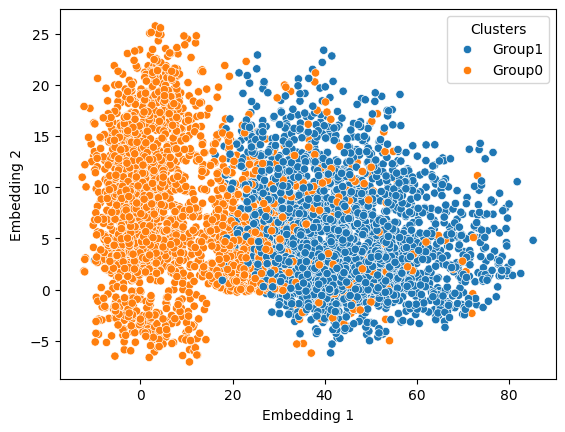

In [57]:
sns.scatterplot(data=results, x='Embedding 1', y='Embedding 2', hue='Clusters');

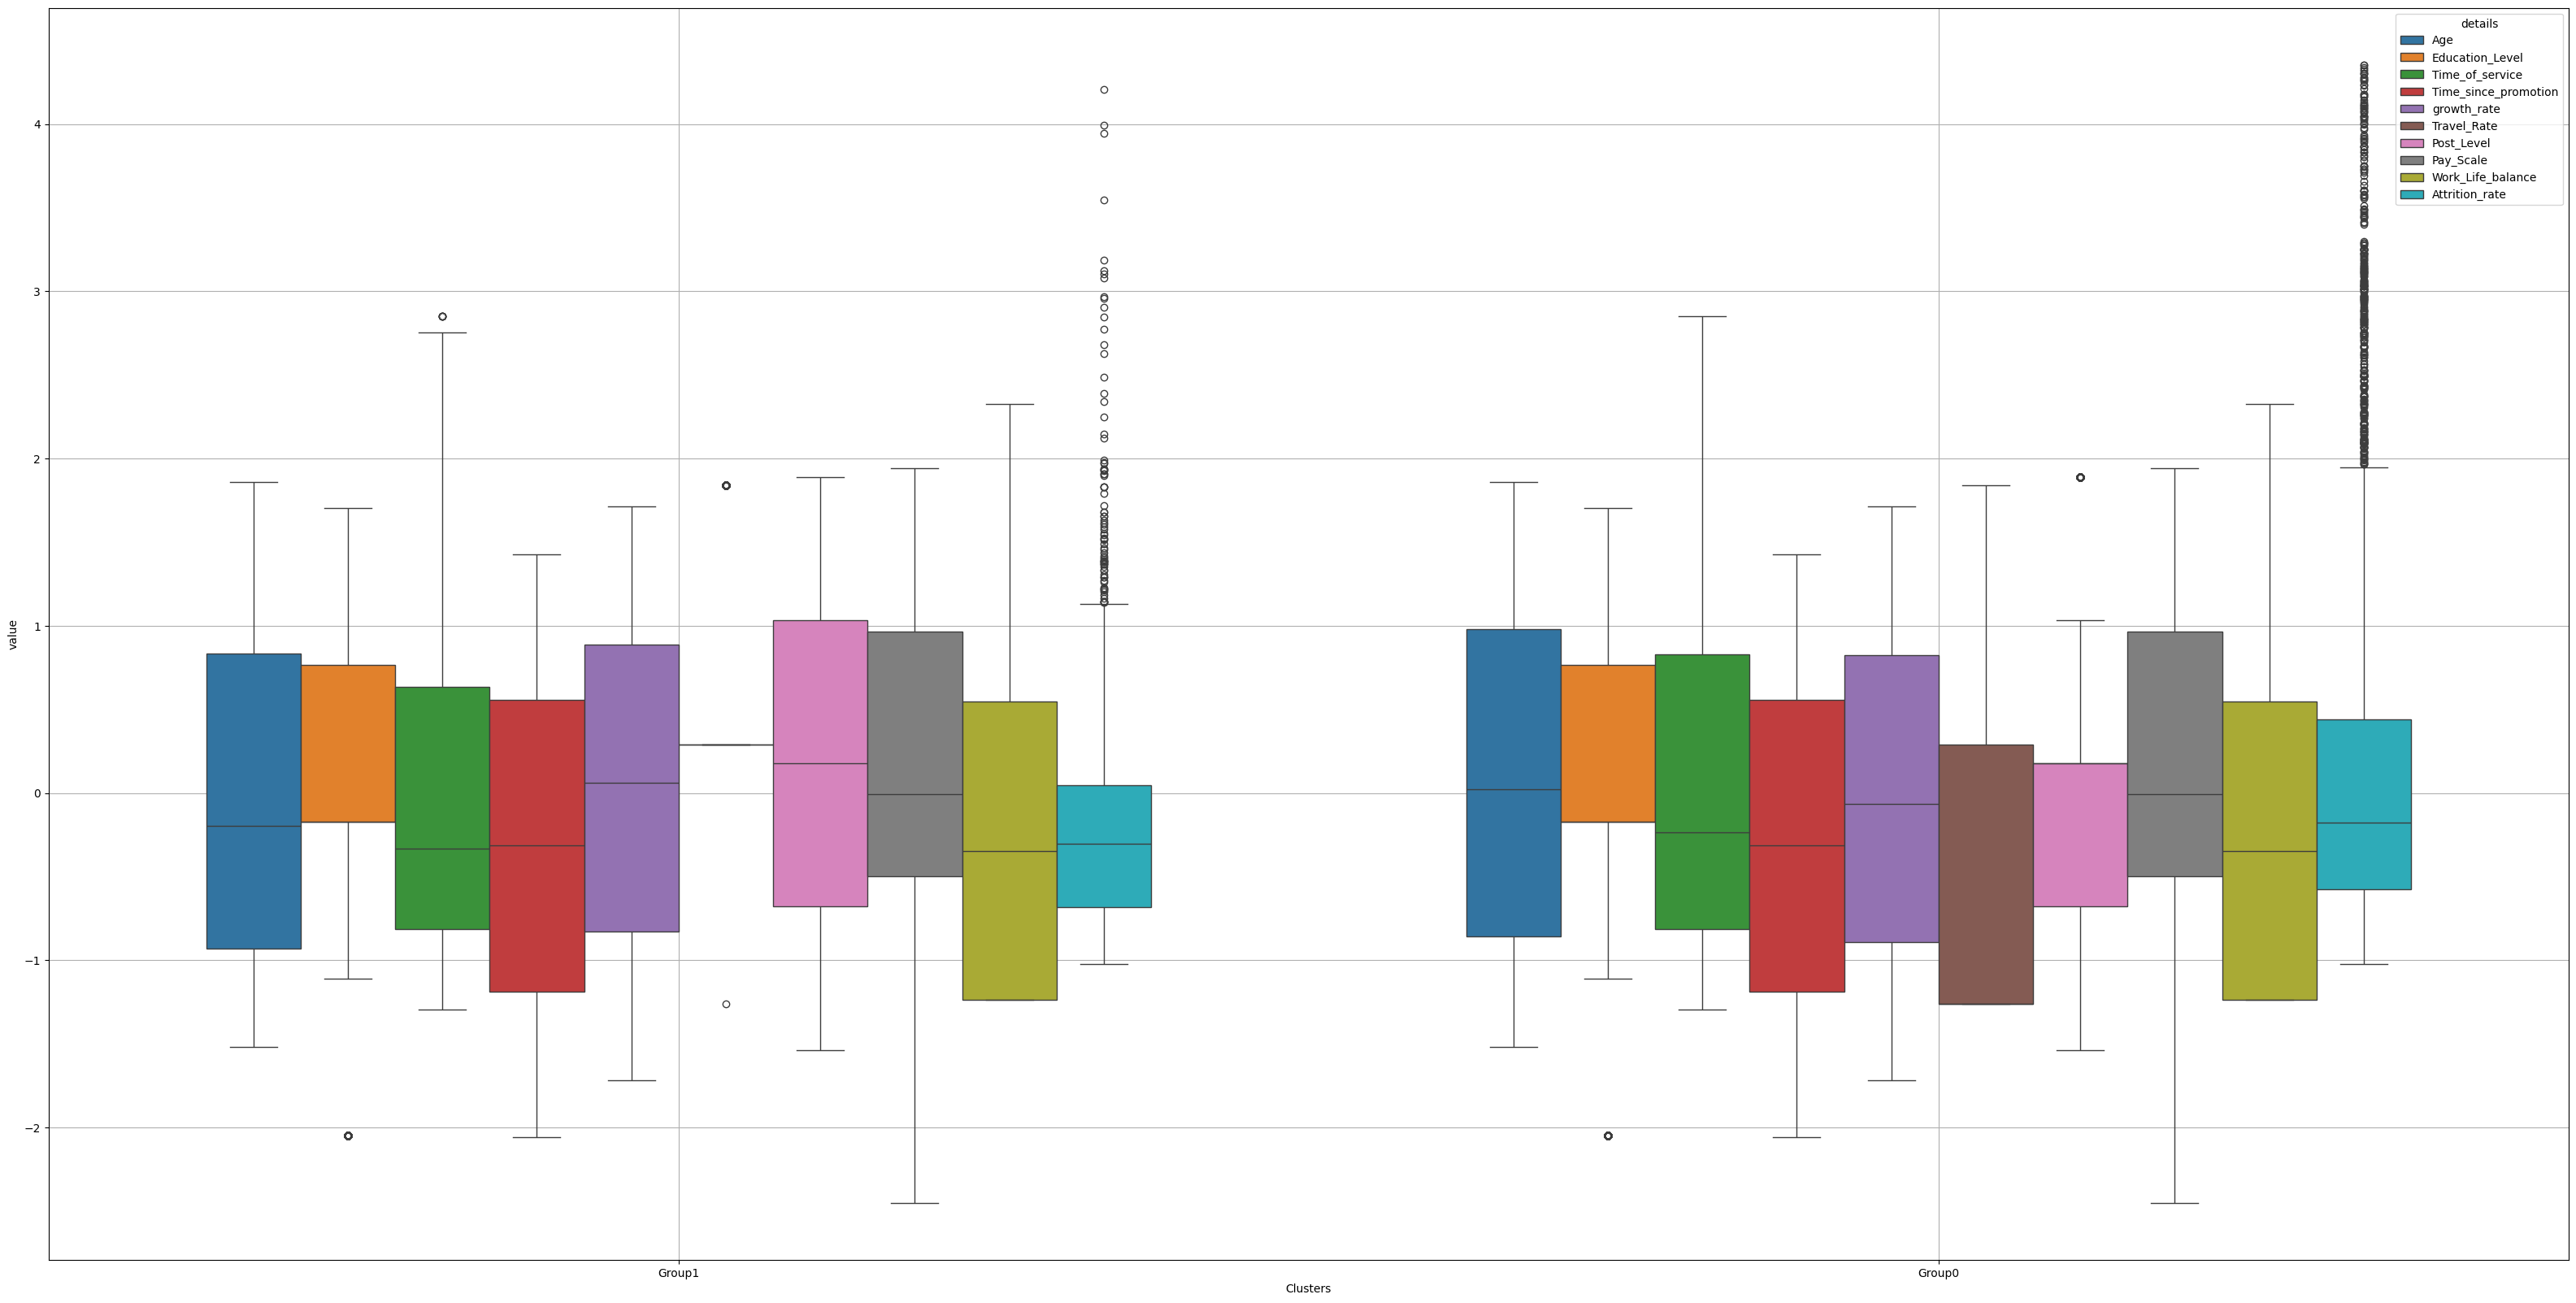

In [58]:
df = employees[continuos_cols]
#df = employees_tf.select_dtypes(include=['float'])
df = (df - df.mean()) / df.std()
df = pd.concat([df, results['Clusters']], axis=1)
#mdf = pd.melt(pd.concat([house.iloc[:, 1:3], house['label']], axis=1), id_vars=['label'], var_name=['details'])
mdf = pd.melt(df, id_vars=['Clusters'], var_name=['details'])
mdf.head()

fig, ax = plt.subplots(figsize=(40, 20))
sns.boxplot(x="Clusters", hue="details", y="value", data=mdf, ax=ax, width=.75)
ax.grid(True)

fig.show()

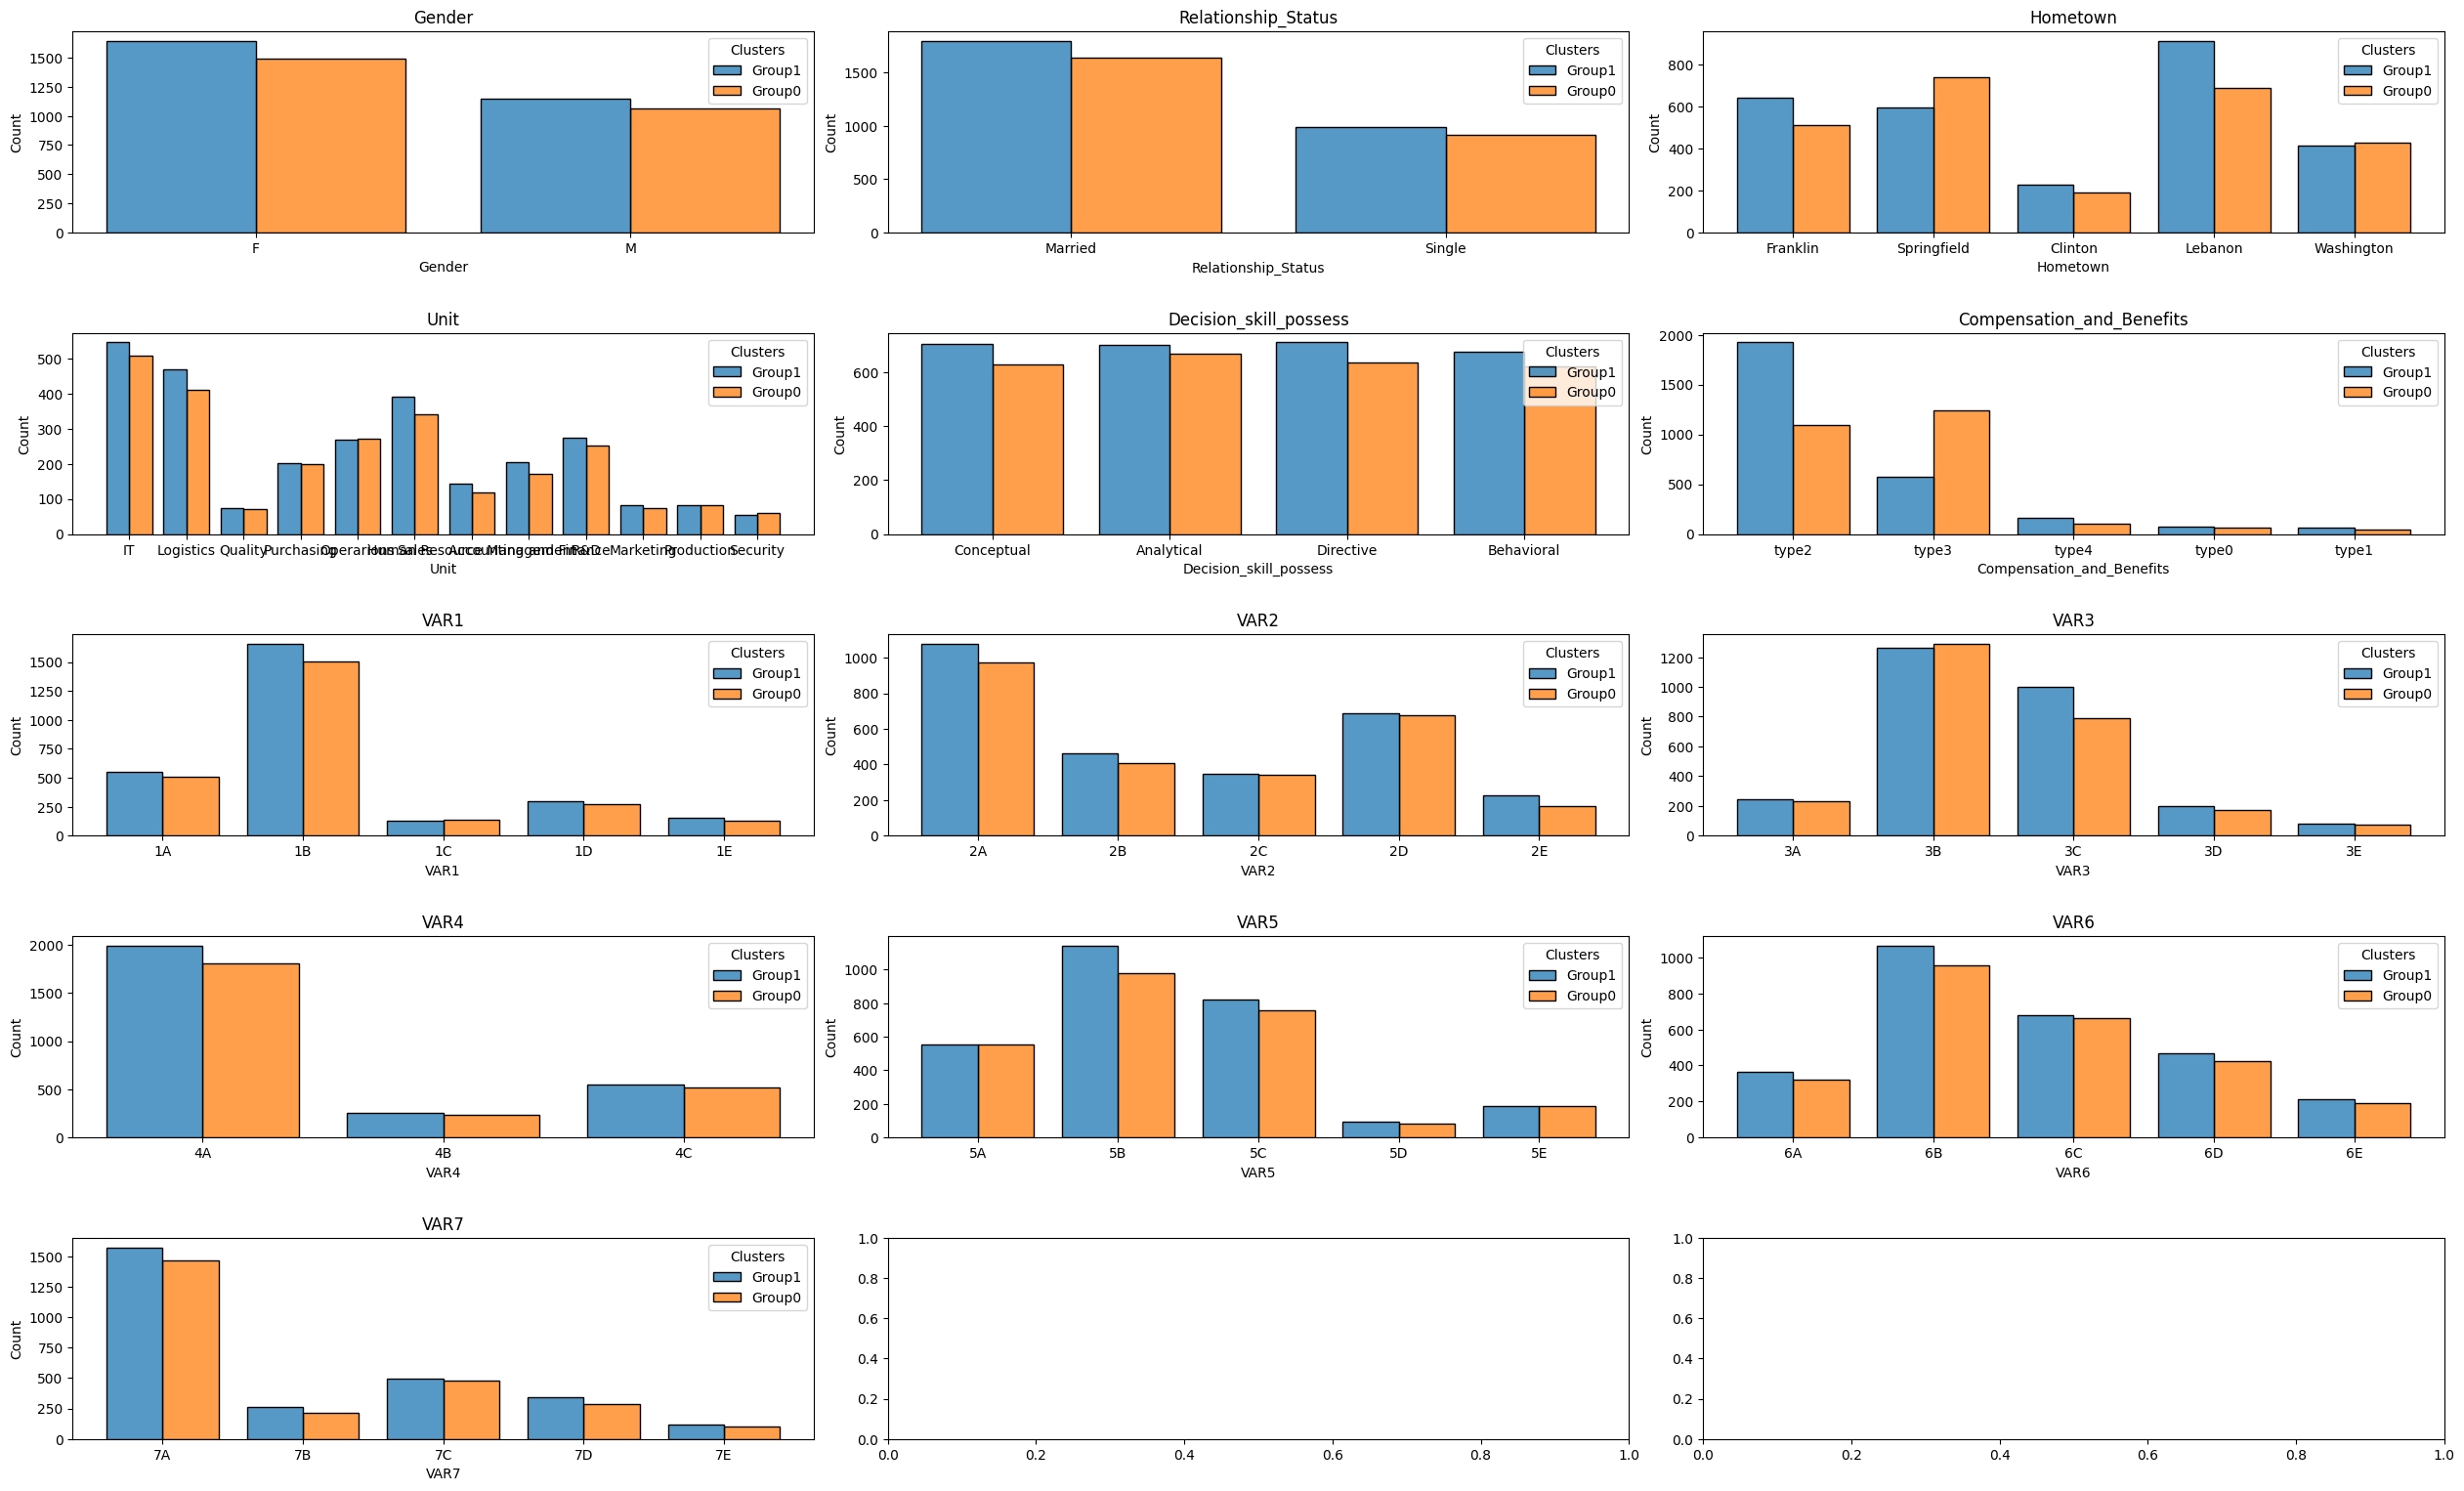

In [59]:
cat_df = results[columns + ['Clusters']]

n_cols=3
n_rows=len(columns) // 3 + len(columns) % 3

# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 15))
fig.tight_layout()
fig.subplots_adjust(wspace=0.1, hspace=0.5)
for i, column in enumerate(columns):
    sns.histplot(cat_df, x=column, hue='Clusters', ax=axes[i // n_cols, i % n_cols], multiple="dodge", shrink=.8).set_title(column)

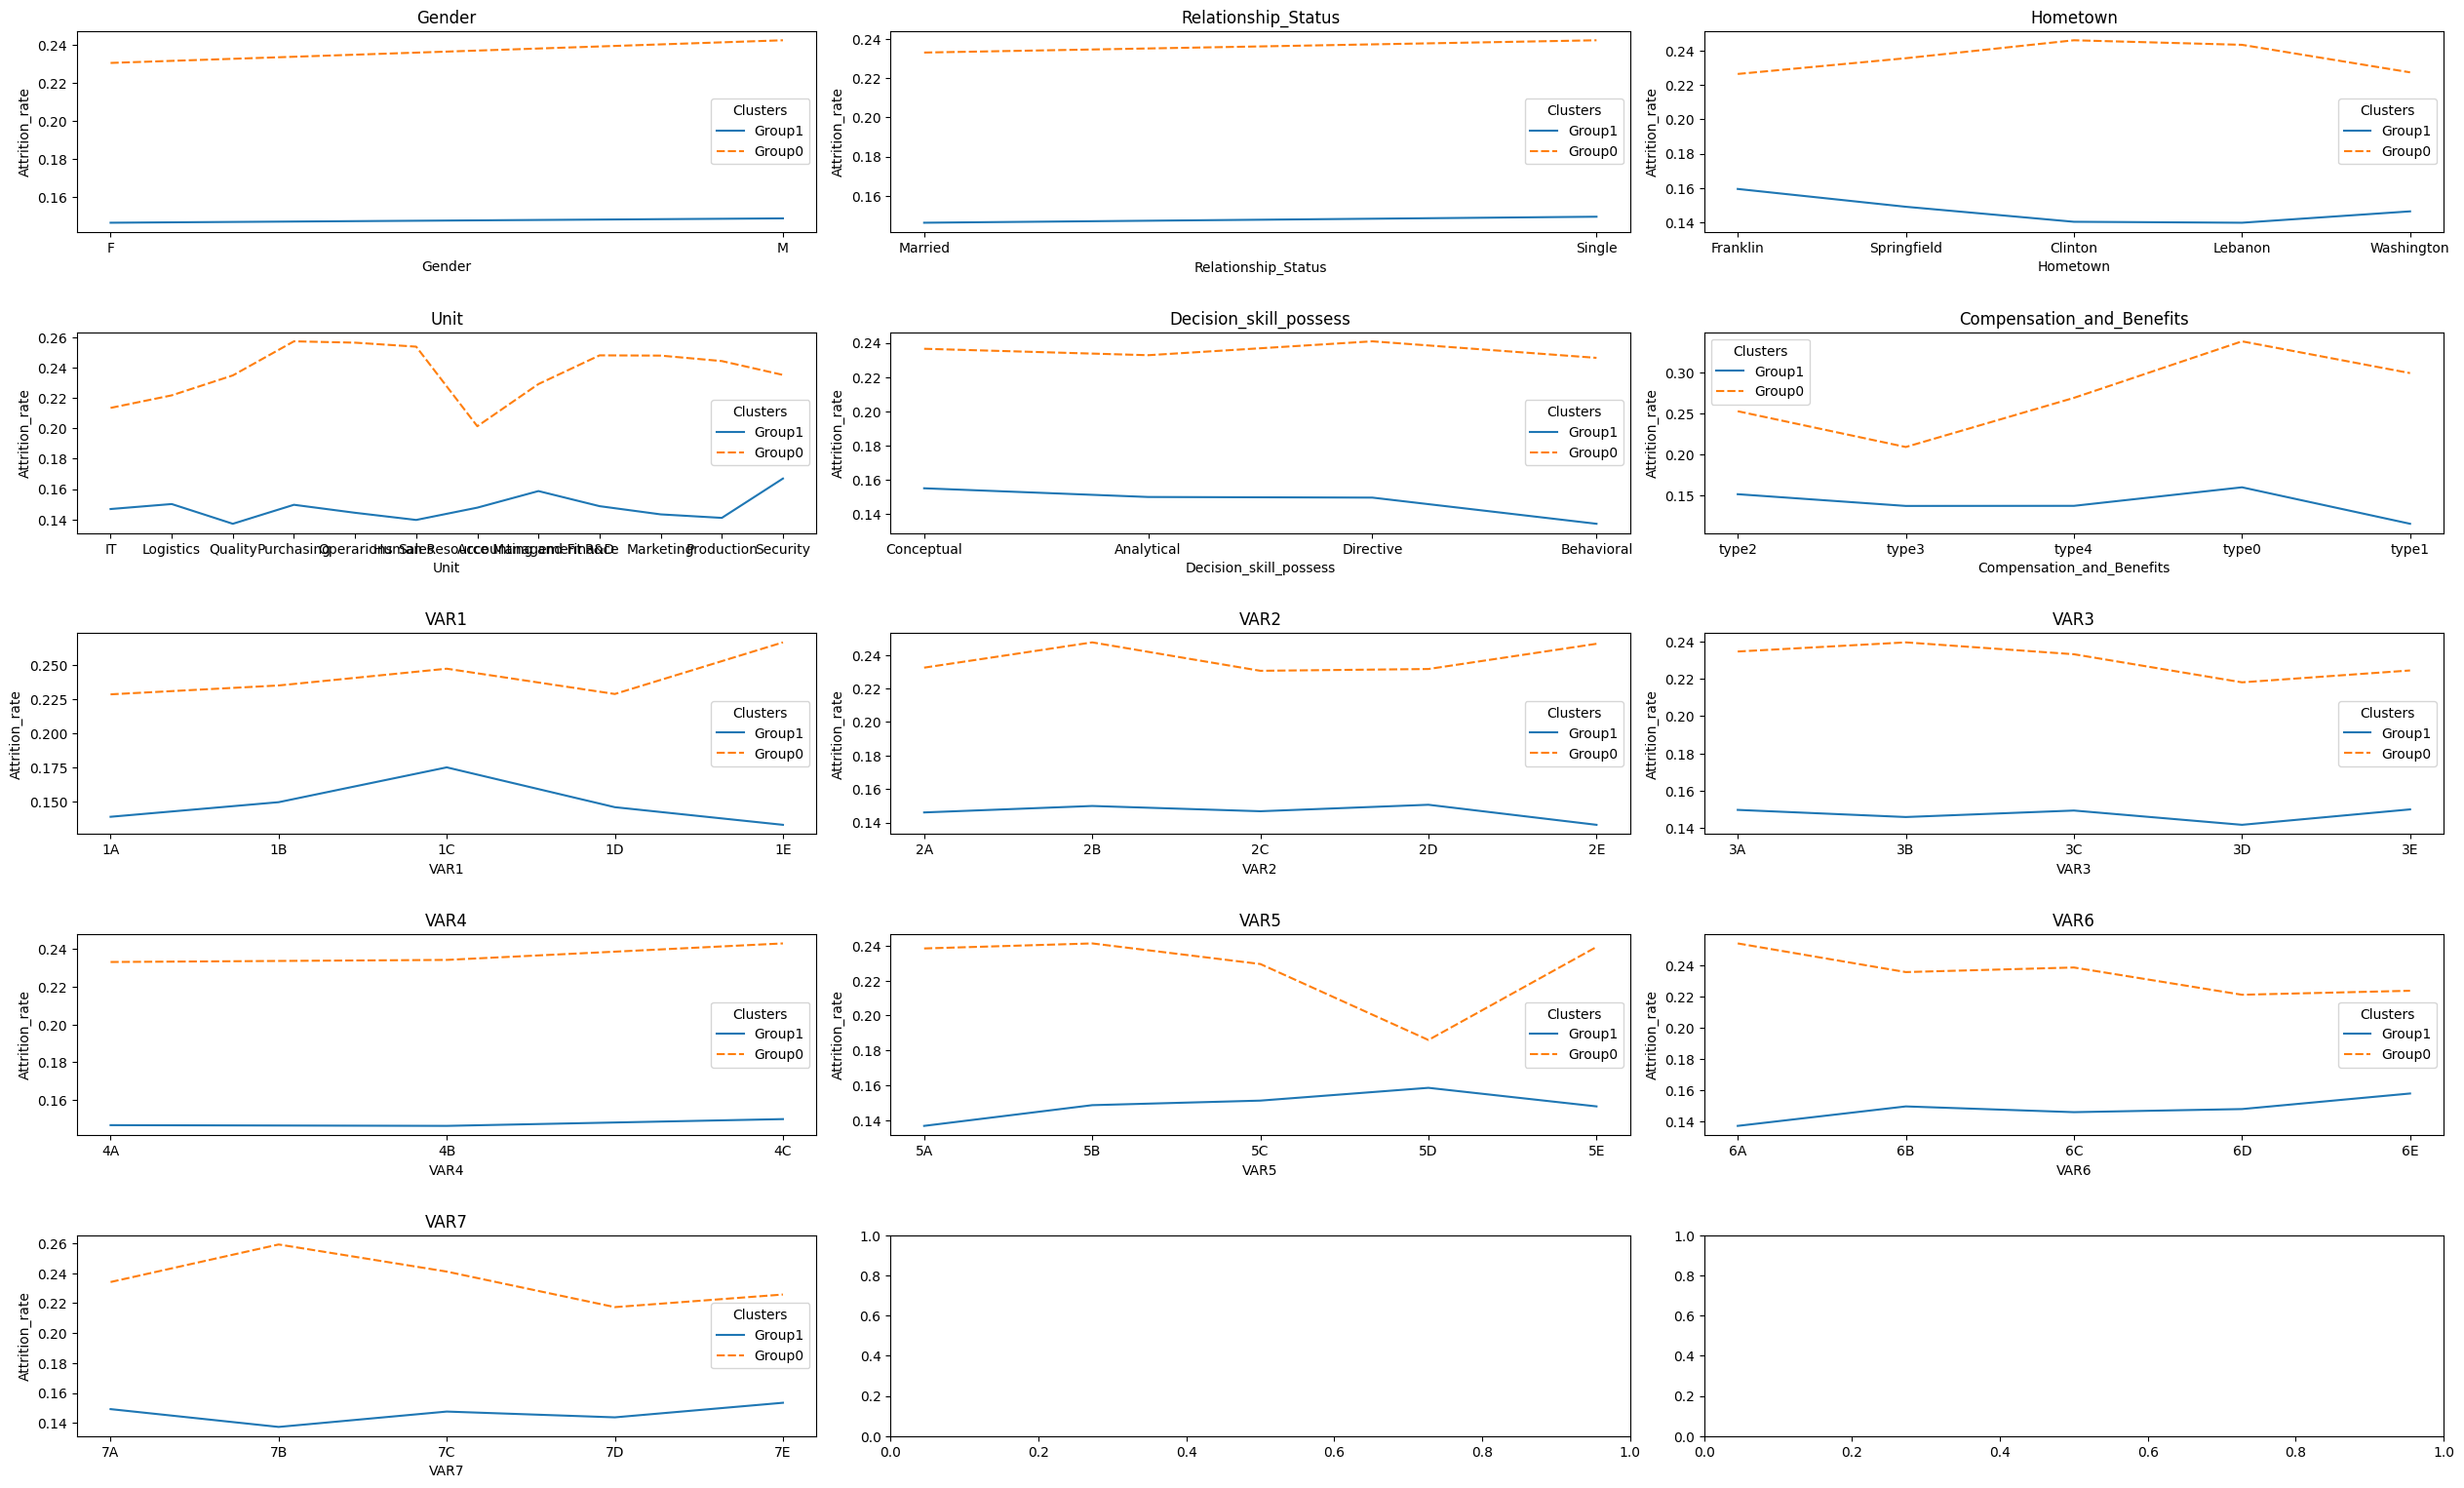

In [60]:
hue_order = results['Clusters'].unique().sort()
n_cols=3
n_rows=len(columns) // 3 + len(columns) % 3

# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 15))
fig.tight_layout()
fig.subplots_adjust(wspace=0.1, hspace=0.5)
for i, column in enumerate(columns):
    sns.lineplot(results, x=column, y='Attrition_rate', hue='Clusters', hue_order=hue_order, ax=axes[i // n_cols, i % n_cols], errorbar=None, style="Clusters").set_title(column);

In [61]:
f = group.get_group('Group1')
f.loc[f['Attrition_rate'] > 0.5, :].describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,38.947368,3.210526,11.421053,2.157895,45.526316,1.210526,2.710526,6.342105,2.526316,0.644774
std,11.325521,1.069425,8.769208,1.027364,15.512396,0.413155,1.183396,1.962848,1.058731,0.129201
min,19.000000,1.000000,0.000000,0.000000,20.000000,1.000000,1.000000,2.000000,1.000000,0.500100
25%,30.000000,3.000000,5.250000,1.000000,32.000000,1.000000,2.000000,5.000000,2.000000,0.543800
50%,38.500000,3.000000,9.000000,2.000000,44.500000,1.000000,3.000000,6.000000,3.000000,0.596300
75%,46.750000,4.000000,14.750000,3.000000,61.250000,1.000000,3.750000,8.000000,3.000000,0.734650
max,60.000000,5.000000,34.000000,4.000000,70.000000,2.000000,5.000000,10.000000,4.000000,0.969000


In [62]:
f = group.get_group('Group0')
f.loc[f['Attrition_rate'] > 0.5, :].describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,39.837905,3.152120,13.311721,2.471322,46.436409,0.735661,2.815461,5.880299,2.463840,0.710921
std,13.959447,1.090551,10.625681,1.170385,16.049660,0.655706,1.191998,2.031166,1.133276,0.136228
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.500400
25%,27.000000,3.000000,5.000000,2.000000,33.000000,0.000000,2.000000,4.000000,1.000000,0.592200
50%,38.000000,3.000000,10.000000,2.000000,46.000000,1.000000,3.000000,6.000000,3.000000,0.703500
75%,53.000000,4.000000,21.000000,4.000000,60.000000,1.000000,4.000000,8.000000,3.000000,0.791500
max,65.000000,5.000000,42.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,0.995900


In [63]:
group.get_group('Group1')

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,label
0,F,42.0,4,Married,Franklin,IT,Conceptual,4,4,33,1,1,7,type2,3,1A,2A,3A,4A,5A,6A,7A,0.1841,Group1
6,F,21.0,4,Married,Springfield,Purchasing,Directive,2,1,50,1,1,6,type2,2,1B,2B,3C,4A,5B,6C,7A,0.2819,Group1
11,F,19.0,5,Single,Springfield,Operarions,Analytical,0,0,25,1,2,5,type4,1,1B,2C,3B,4A,5B,6D,7A,0.0800,Group1
13,F,23.0,4,Single,Washington,Logistics,Conceptual,4,2,70,1,3,8,type2,3,1A,2D,3D,4A,5A,6B,7A,0.1696,Group1
18,M,33.0,3,Single,Springfield,Accounting and Finance,Analytical,9,1,39,1,2,5,type3,1,1B,2C,3C,4A,5B,6B,7A,0.0560,Group1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,M,22.0,4,Married,Lebanon,Logistics,Analytical,3,3,43,1,3,10,type3,3,1B,2E,3C,4B,5C,6B,7B,0.2523,Group1
6991,M,26.0,5,Married,Franklin,Accounting and Finance,Conceptual,2,2,51,1,3,5,type2,2,1D,2A,3C,4A,5A,6D,7A,0.2265,Group1
6992,F,26.0,1,Married,Franklin,Accounting and Finance,Analytical,4,2,52,1,3,3,type2,1,1C,2D,3C,4A,5B,6B,7A,0.2238,Group1
6993,M,33.0,4,Married,Franklin,Logistics,Directive,7,4,66,2,4,6,type3,2,1B,2D,3B,4A,5A,6C,7A,0.2569,Group1


### Conclusión

Se uso UMAP como método para reducir componentes debido a que FAMD presento muy poca varianza en cada componente (y PCA no se puede usar en datos mixtos) por lo que se optó por usar un método no lineal.

El mejor resultado lo dio por medio de K-means con 2 grupos usando el método de la silueta (0.55) y despues de realizar el agrupamiento aunque ambos grupos presentan información muy similar el primer grupo (Grupo 0) tiene a empleados de mayor edad con un tiempo de servicio mayor pero con una tasa de crecimiento menor. En general este grupo presenta un desgaste mayor (unque es díficil apreciar debido al gran número de empleados que no tienen desgaste y desbalancean la distribución). También en este grupo se puede apreciar que tienen un mejor balance en su tiempo entre el trabajo y vida personal y menor tiempo de viaje.

En cambio el grupo 1 es más joven, con menor balance de tiempo personal y trabajo.

Lás demás variables se distribuyen de igual manera en ambos grupos (no hay más peso hacia un tipo de área o nivel de pago, género y situación marital). Las variables encriptadas VAR1 a VAR7 se distribuyen de igual manera en ambos grupos y al no saber de que tratan solo s epuede concluir que no da suficiente información para mover al empleado entre los grupos.